In [1]:
%matplotlib notebook
%matplotlib notebook
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
fluid = loadmat('/Users/senlin/Downloads/DATA-2/FLUIDS/CYLINDER_ALL.mat')

In [3]:
snapshots = fluid['VORTALL']
m = int(fluid['m'])
n = int(fluid['n'])

(a)

In [4]:
U,S,VT = np.linalg.svd(snapshots, full_matrices = False)

<IPython.core.display.Javascript object>


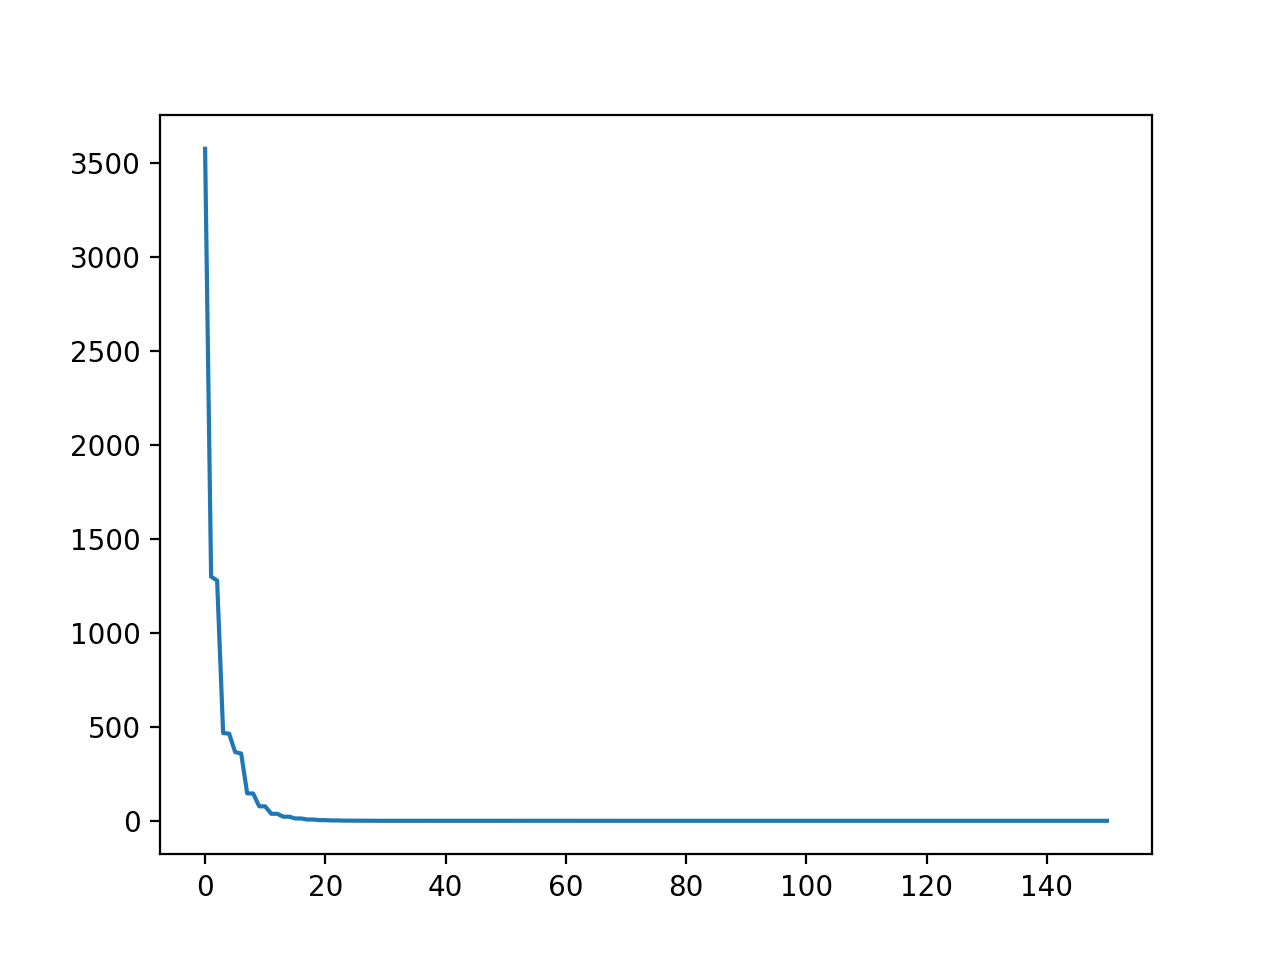

In [5]:
plt.figure()
plt.plot(S)
plt.show()

<IPython.core.display.Javascript object>


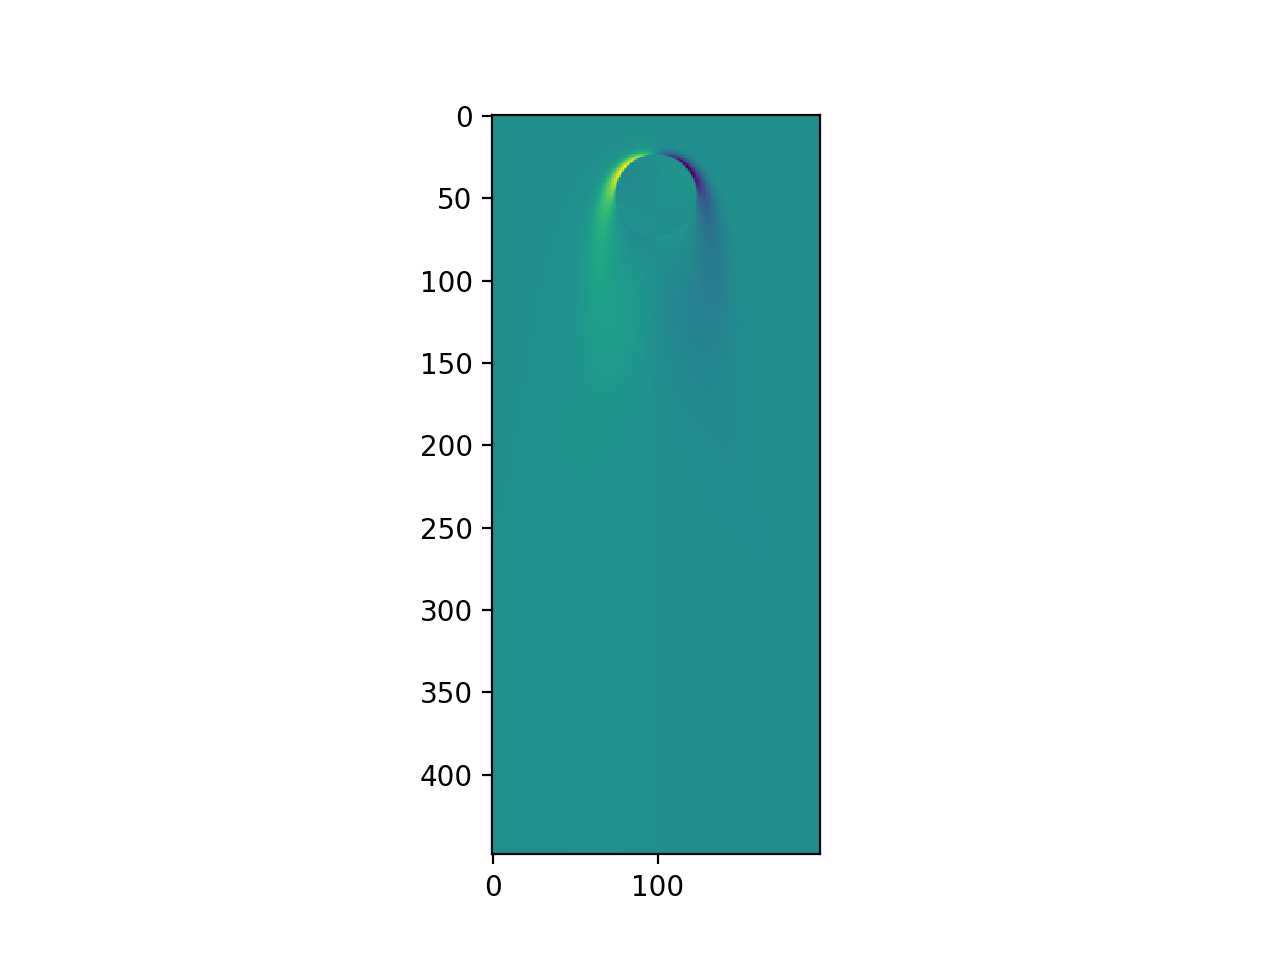

In [15]:
plt.figure()
plt.imshow(U[:,0].reshape(n,m))
plt.show()

<IPython.core.display.Javascript object>


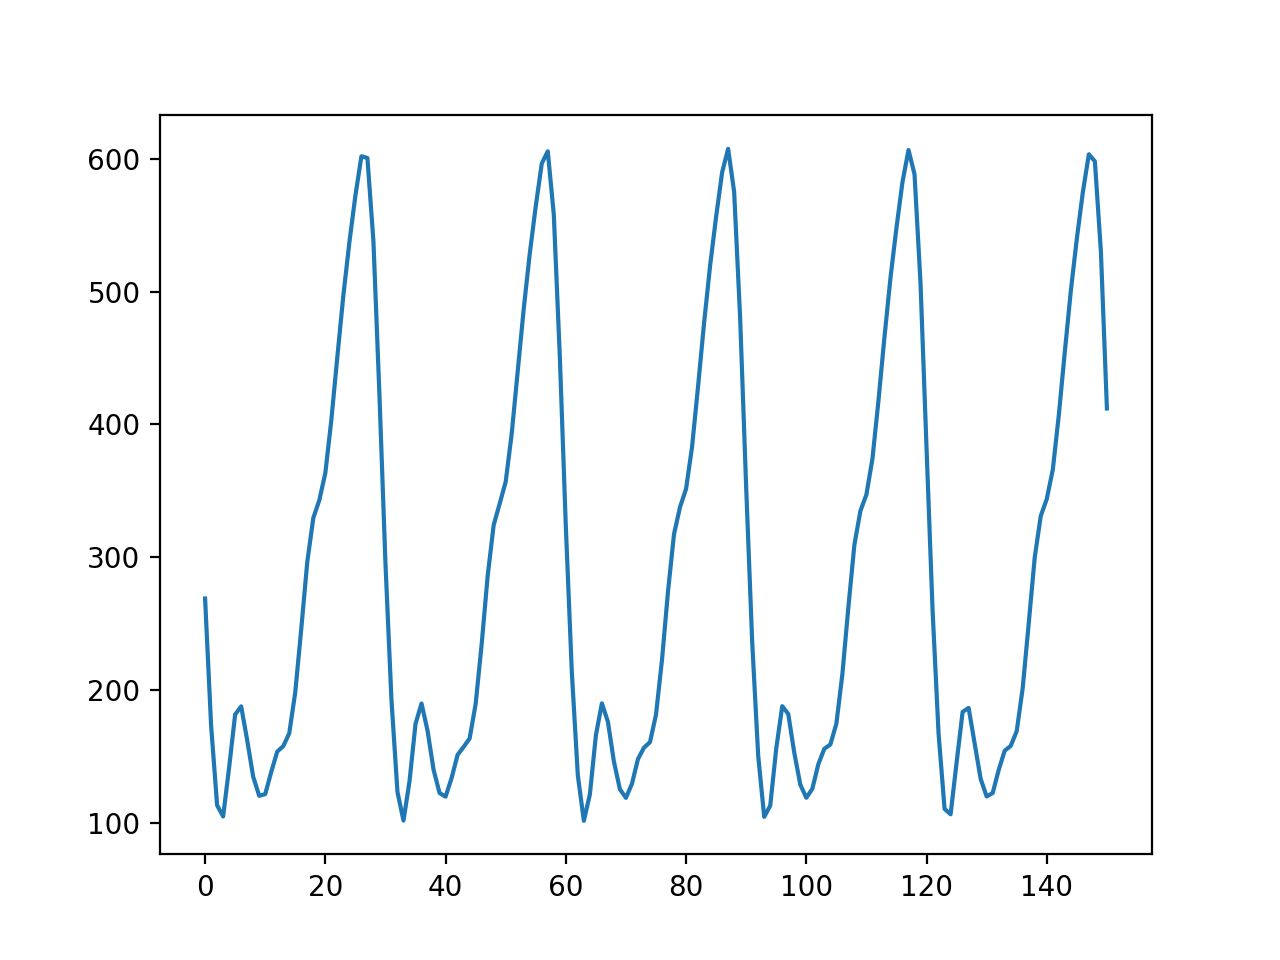

In [14]:
plt.figure()
plt.plot(S@VT)
plt.show()

(b)

In [17]:
S = np.diag(S)

<IPython.core.display.Javascript object>


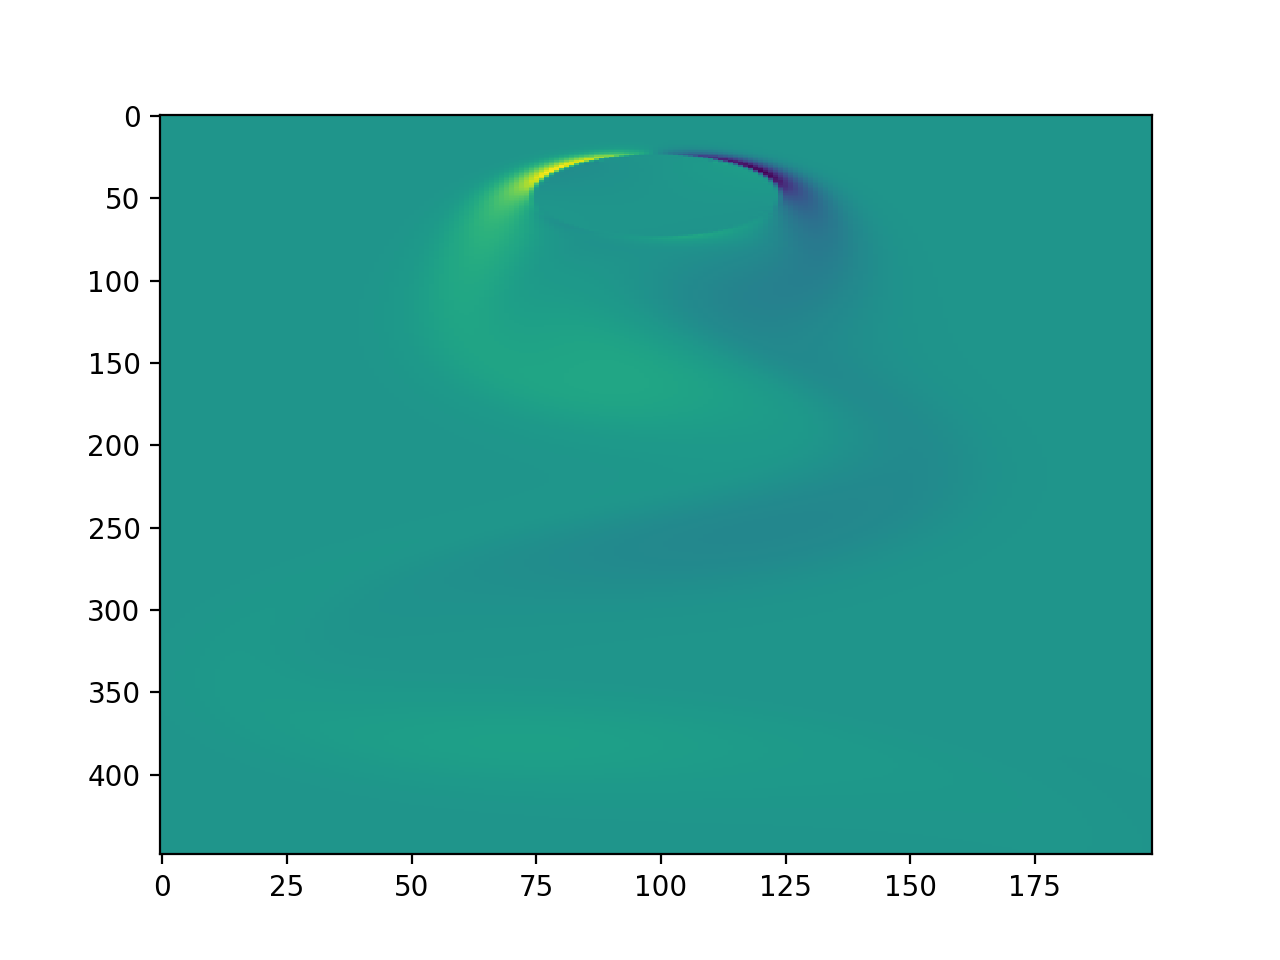

In [25]:
r = 100
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]  

fig, ax = plt.subplots()
im = plt.imshow(Xapprox[:,0].reshape(n,m), interpolation='none', aspect='auto')
# image, = ax.imshow([])

def animate(frame_num):
    data = Xapprox[:,1+frame_num].reshape(n,m)
    im.set_array(data)
    return [im]

anim = FuncAnimation(fig, animate, interval=1)
# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

In [37]:
exVar = np.cumsum(np.diag(S)/np.sum(np.diag(S)))
reconst_error = []

6


<IPython.core.display.Javascript object>


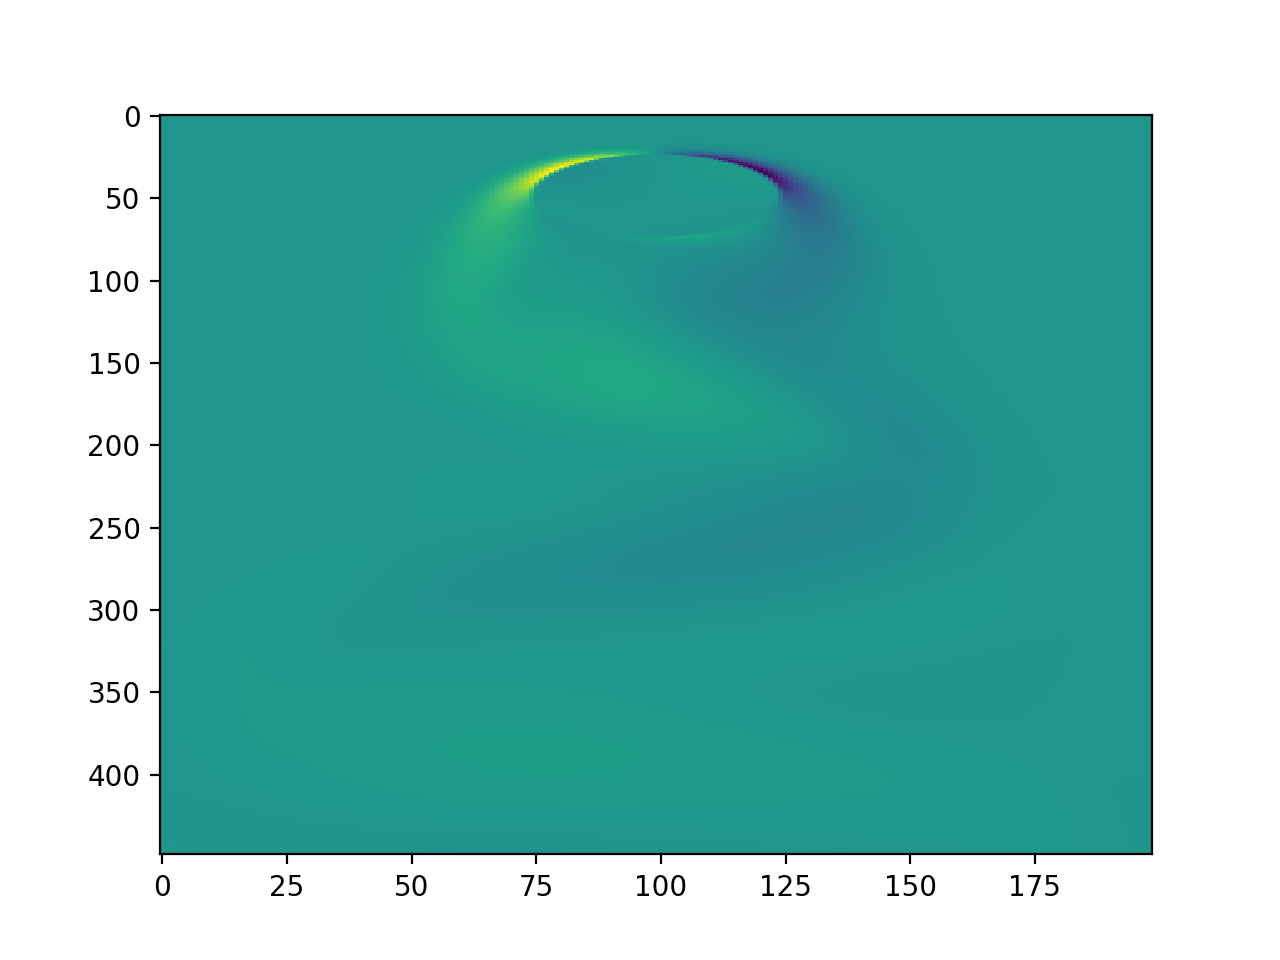

In [38]:
r = np.min(np.where(exVar>=0.9))
print(r)
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]  
reconst_error.append(np.linalg.norm(Xapprox-snapshots,'fro'))

fig, ax = plt.subplots()
im = plt.imshow(Xapprox[:,0].reshape(n,m), interpolation='none', aspect='auto')
# image, = ax.imshow([])

def animate(frame_num):
    data = Xapprox[:,1+frame_num].reshape(n,m)
    im.set_array(data)
    return [im]

anim = FuncAnimation(fig, animate, interval=1)
# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

13


<IPython.core.display.Javascript object>


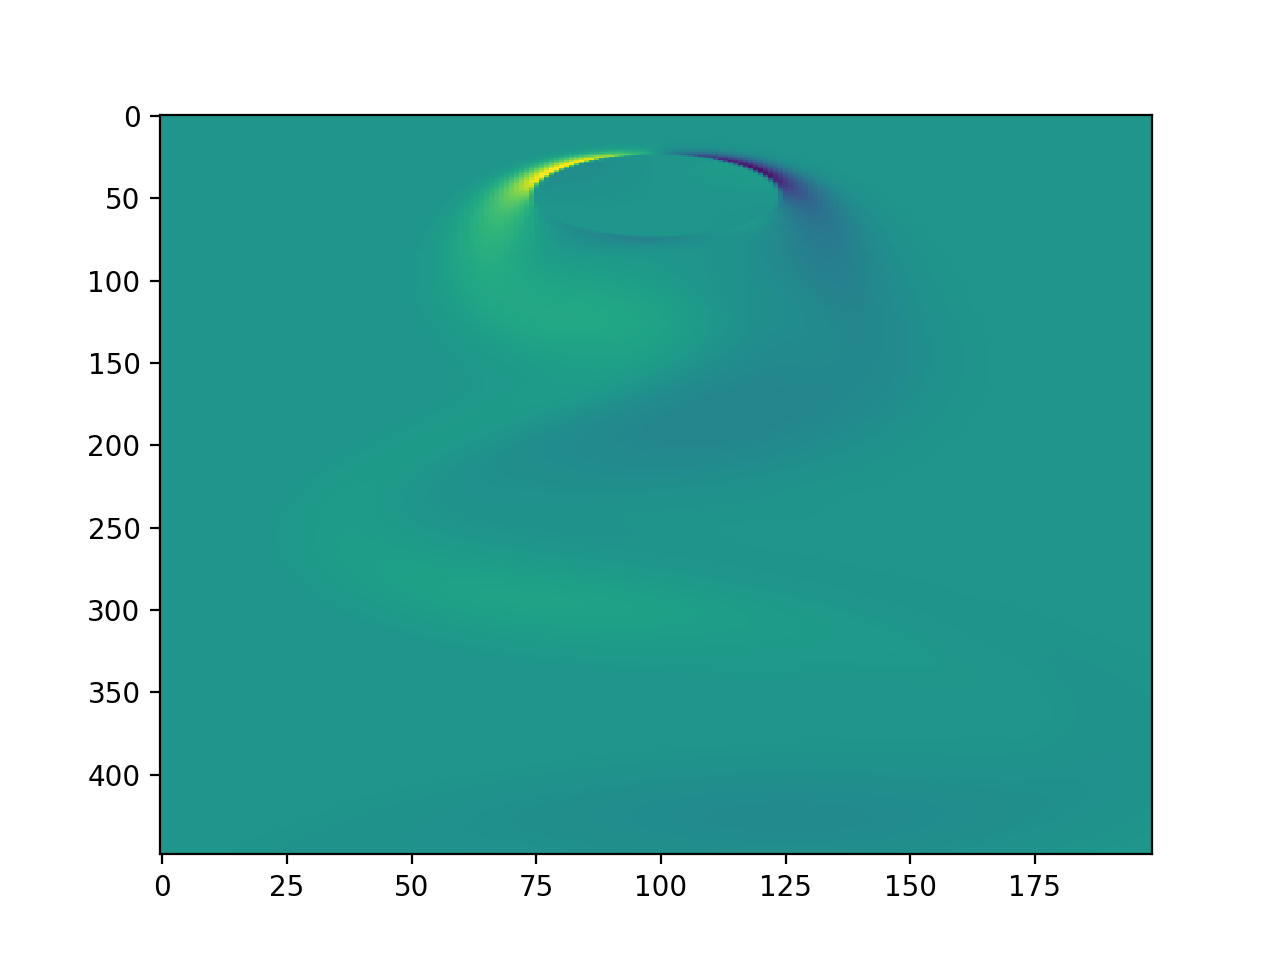

In [39]:
r = np.min(np.where(exVar>=0.99))
print(r)
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]  
reconst_error.append(np.linalg.norm(Xapprox-snapshots,'fro'))

fig, ax = plt.subplots()
im = plt.imshow(Xapprox[:,0].reshape(n,m), interpolation='none', aspect='auto')
# image, = ax.imshow([])

def animate(frame_num):
    data = Xapprox[:,1+frame_num].reshape(n,m)
    im.set_array(data)
    return [im]

anim = FuncAnimation(fig, animate, interval=1)
# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

20


<IPython.core.display.Javascript object>


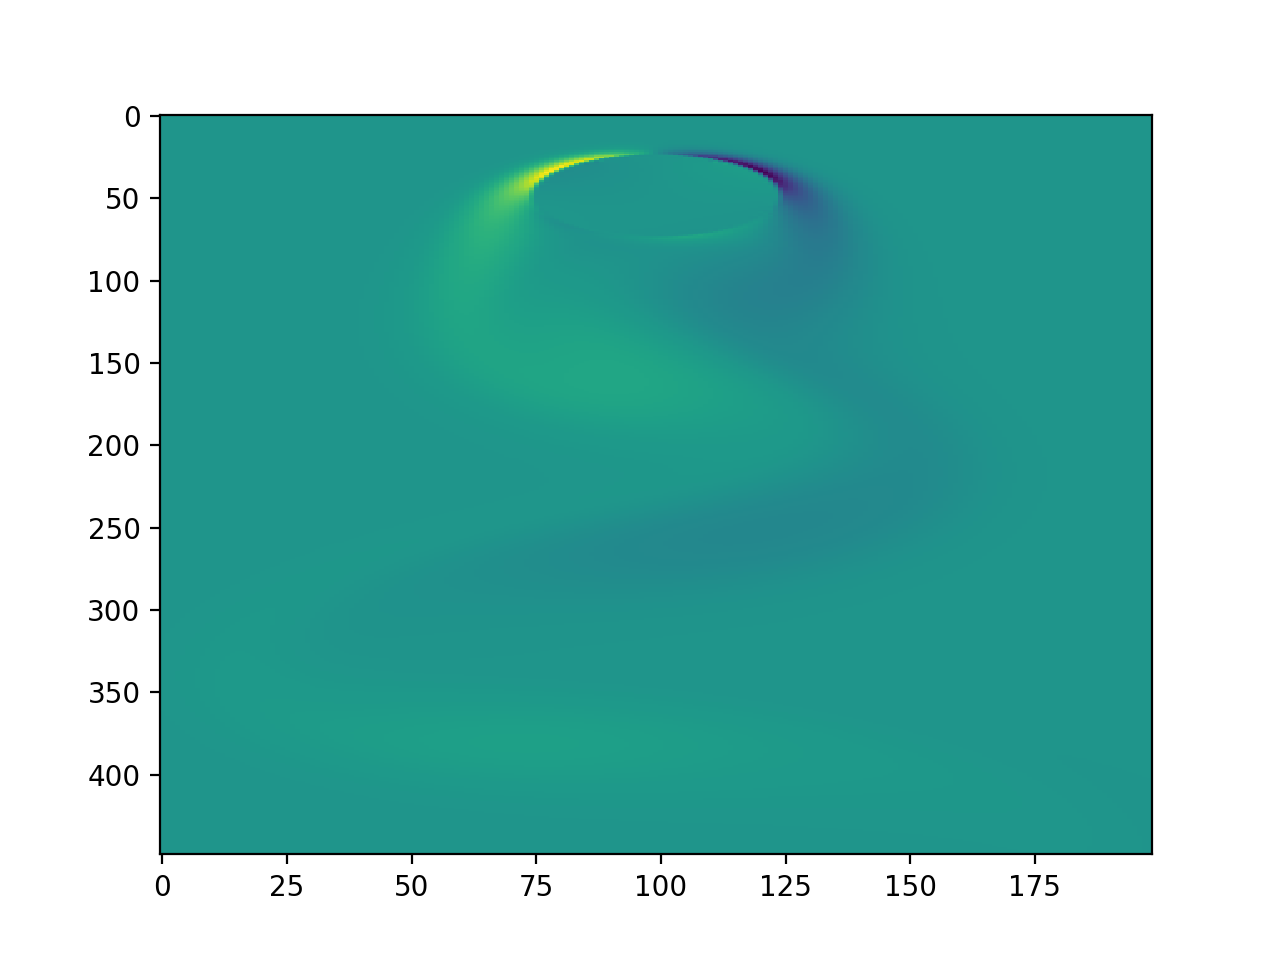

In [40]:
r = np.min(np.where(exVar>=0.999))
print(r)
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]  
reconst_error.append(np.linalg.norm(Xapprox-snapshots,'fro'))

fig, ax = plt.subplots()
im = plt.imshow(Xapprox[:,0].reshape(n,m), interpolation='none', aspect='auto')
# image, = ax.imshow([])

def animate(frame_num):
    data = Xapprox[:,1+frame_num].reshape(n,m)
    im.set_array(data)
    return [im]

anim = FuncAnimation(fig, animate, interval=1)
# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

In [41]:
reconst_error

[431.93496687586185, 37.25647239311567, 4.778737405498607]

(c)

In [42]:
r = 10
w = S[0:r,:r] @ VT[:r,:]

In [55]:
np.mean((U[:,:r]@w[:,0]-snapshots[:,0])**2)

0.0004456536766312828

In [59]:
np.mean((U[:,:r]@w[:,0]-snapshots[:,2])**2)

0.10451525654776185

(d)

In [62]:
t = VT.shape[0]

In [68]:
W1 = S[0:t-1,:t-1] @ VT[0:t-1,:]
W2 = S[1:t,1:t] @ VT[1:t,:]

In [86]:
UW,SW,VTW = np.linalg.svd(W1,full_matrices = False)

In [87]:
invSW = np.diag(1/SW)
A = W2 @ VTW.T @ invSW @UW.T

<IPython.core.display.Javascript object>


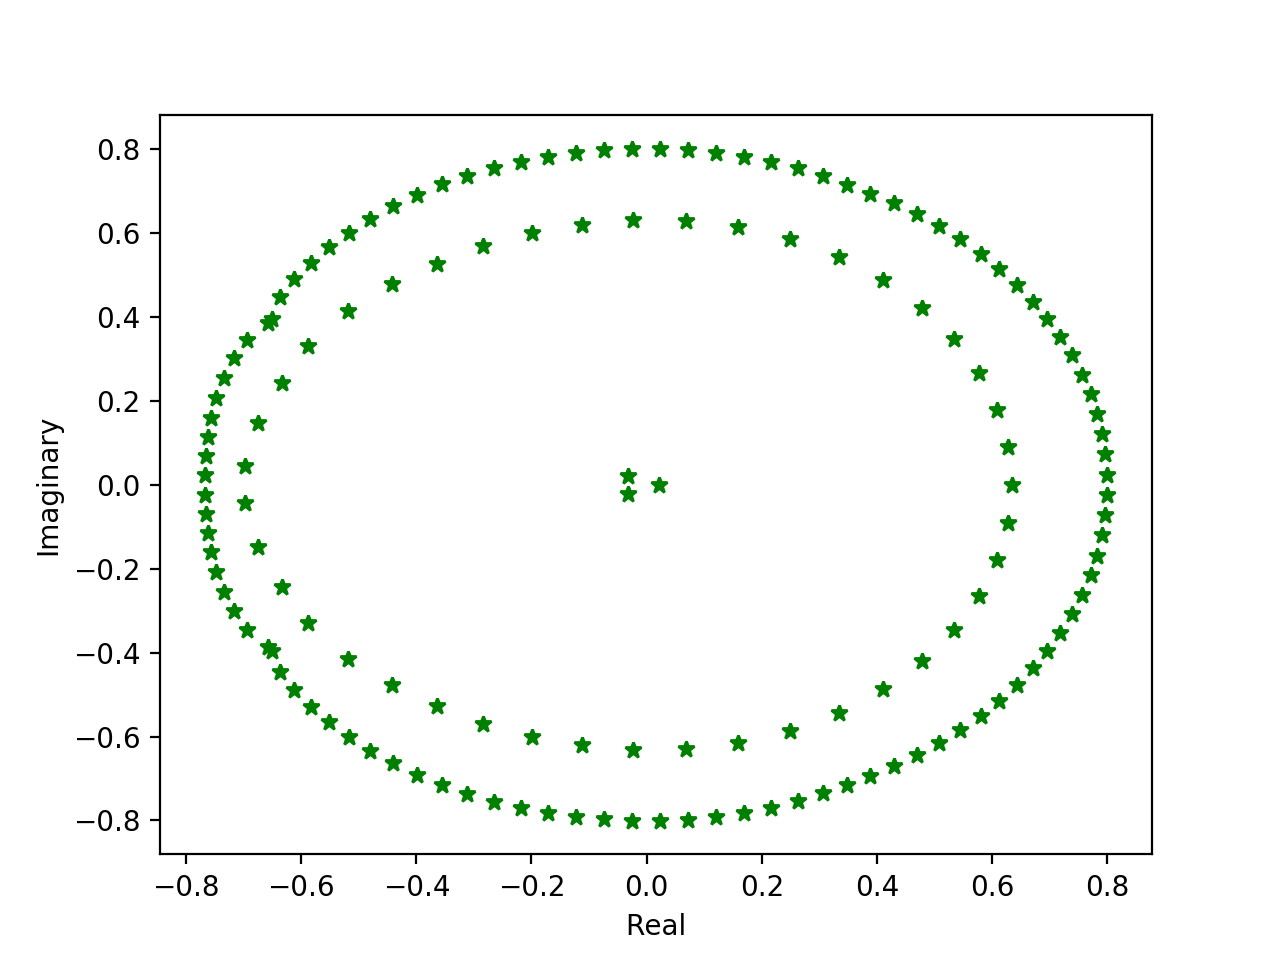

In [96]:
plt.figure()
eigen = np.linalg.eig(A)[0]
X = [x.real for x in eigen]
Y = [x.imag for x in eigen]
plt.plot(X, Y, 'g*')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

(e)

In [108]:
pred = A@W1
reconst = U[:,1:]@pred

<IPython.core.display.Javascript object>


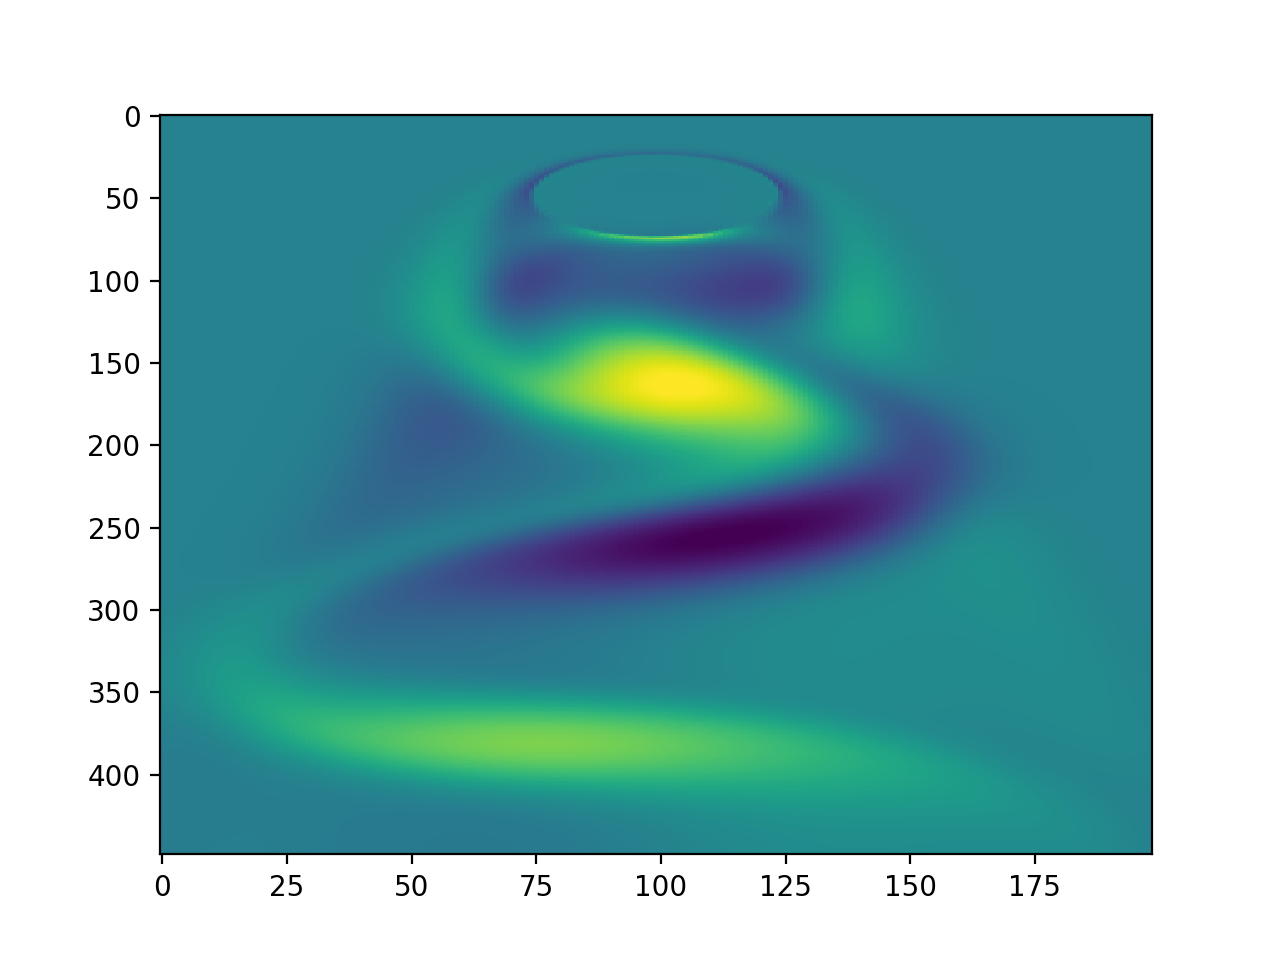

In [144]:
fig, ax = plt.subplots()
im = plt.imshow(reconst[:,0].reshape(n,m), interpolation='none', aspect='auto')
# image, = ax.imshow([])

def animate(frame_num):
    data = reconst[:,1+frame_num].reshape(n,m)
    im.set_array(data)
    return [im]

anim = FuncAnimation(fig, animate, interval=1)
# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

In [115]:
np.mean((reconst-snapshots)**2,0)

array([0.95363385, 0.9555869 , 0.95626022, 0.95554629, 0.95342769,
       0.95011563, 0.94623285, 0.94259359, 0.93989086, 0.93859858,
       0.9389492 , 0.94088188, 0.94401409, 0.94775514, 0.95146239,
       0.95454843, 0.95656216, 0.95724696, 0.95650762, 0.95433979,
       0.95093364, 0.94687567, 0.94297874, 0.93995278, 0.93829298,
       0.93825816, 0.93982791, 0.94266541, 0.94621529, 0.94986097,
       0.95302526, 0.95524428, 0.956226  , 0.95583623, 0.95403575,
       0.95095827, 0.94713511, 0.94337097, 0.94040214, 0.93875478,
       0.93872064, 0.94031153, 0.9432153 , 0.9468731 , 0.95064351,
       0.95391904, 0.95620992, 0.95721382, 0.95680592, 0.95496147,
       0.9518041 , 0.94782584, 0.94382211, 0.94054357, 0.93853668,
       0.93811805, 0.93933685, 0.94192622, 0.94536629, 0.94904372,
       0.9523654 , 0.95483499, 0.95611858, 0.9560508 , 0.95457397,
       0.95175962, 0.94804064, 0.94419167, 0.94098453, 0.93899822,
       0.93857957, 0.93981217, 0.9424565 , 0.94599655, 0.94979